# [ELE 083] Computação Evolucionária: Trabalho Prático 3
__Aluno:__
- Hernane Braga Pereira - 2014112627

---
# Enunciado

Testar o código do Algoritmo de Evolução Diferencial para os seguintes problemas multimodais de otimização continua:

- **Rastrigin**: para -2 <= x1 <= 2, -2 <= x2 <= 3 com N = 100; mínimo global em
x\*=[0, 0] com f(x*) = -20.

- **Peaks**: para -3 <= x1 <= 3, -3 <= x2 <= 3 com N = 100; mínimo global em
x\*=[0.228,­1.625] com f(x*) = -6.5511.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def rastrigin(x):
    Q = np.identity(len(x))
    X = Q @ x
    n = len(x)
    F = 0

    for i in range(n):
        F = F + X[i] ** 2 - 10 * np.cos(2 * np.pi * X[i])
    return F


In [3]:
def peaks(X):
    x = X[0]
    y = X[1]
    exp_1 = 3 * (1 - x) ** 2 * np.exp(- (x ** 2) - (y + 1) ** 2)
    exp_2 = 10 * (x / 5 - x ** 3 - y ** 5) * np.exp(-(x ** 2) - (y ** 2))
    exp_3 = (1 / 3) * np.exp(-(x + 1) ** 2 - (y ** 2))
    return exp_1 - exp_2 - exp_3

In [4]:
print('Rastrigin function minimum global:')
print(rastrigin([0, 0]))

print('\n\nPeaks function minimum global:')
peaks([0.228, -1.625])

Rastrigin function minimum global:
-20.0


Peaks function minimum global:


-6.551127887452801

# Algoritmo de evolução diferencial
## Iniciando população

Função `init_population` que inicia uma matriz dentro do range proposto no problema

In [5]:
def init_population(low_values, high_values, n_pop):
    """ 
        Start Differencial Evolution Algorithm population
        ------
        Parameters:
            low_values: min value for each variable of the problem
            high_values: max value for each variable of the problem
            n_pop: Number of solutions on population
        ------
        Return: numpy ndarray
            inicial random population
    """
    population = np.random.uniform(low=low_values, high=high_values, size=(n_pop, len(low_values)))
    return population

In [6]:
low_values = [-2, -2]
high_values = [2, 2]
n_pop = 5
population = init_population(low_values, high_values, n_pop)
population

array([[ 0.05048869, -1.83512468],
       [-1.26582889,  0.35594389],
       [ 1.01082151,  1.54249344],
       [-0.44679009, -1.75880679],
       [-0.16137925,  0.20793424]])

## Mutação
Função `mutation` recebe uma solução inicial de base e outras duas que formará o vetor de diferença. O vetor de mutação é formado à partir do vetor de diferença e o fator de escala F.

In [7]:
def mutation(base_vector, A_vector, B_vector, F):
    """ 
        Apply mutation on a base vector
        ------
        Parameters:
            base_vector: base vector to sum the difference vector
            A_vector: First vector to apply difference
            B_vector: Second vector to apply difference
            F: scale vector
        ------
        Return: numpy ndarray
            Mutation vector 
    """
    diff_vector = F*(A_vector - B_vector)
    mutation_vector = base_vector + (diff_vector)
    return mutation_vector

In [8]:
F = np.random.uniform(low=0.7, high=0.9, size=1)
base_vector = population[0]
A_vector = population[1]
B_vector = population[2]
diff_vector = F*(A_vector - B_vector)

mutation_vector = mutation(base_vector, A_vector, B_vector, F)
print('base vector:', base_vector)
print('A vector:', A_vector)
print('B vector:', B_vector)
print('\ndiff_vector:',A_vector-B_vector,'\tF:', F)
print('\nmutation_vector:', mutation_vector)


base vector: [ 0.05048869 -1.83512468]
A vector: [-1.26582889  0.35594389]
B vector: [1.01082151 1.54249344]

diff_vector: [-2.2766504  -1.18654955] 	F: [0.76409595]

mutation_vector: [-1.68909066 -2.74176238]


## Recombinação
Na função `recombination`, o vetor de mutação e a solução original são combinadas à partir de um fator de combinação C 

In [9]:
def recombination(base_vector, mutation_vector, C):
    """ 
        Recombine the base vector and mutation vector
        ------
        Parameters:
            base_vector: base vector to recombine solutions
            mutation_vector: mutation based vector
            C: recombination probability
        ------
        Return: numpy ndarray
            Child vector 
    """
    children = mutation_vector.copy()
    rdn = np.random.uniform(0,1)
    if(rdn > C): children[1] = base_vector[1]
    return children

In [10]:
base_vector = population[0]
mutation_vector = mutation_vector
C = np.random.uniform(low=0.6, high=0.9, size=1)
child = recombination(base_vector, mutation_vector, C)
print('base vector:', base_vector)
print('mutation vector:', mutation_vector)
print('C:', C)
print('\nchild:', child)


base vector: [ 0.05048869 -1.83512468]
mutation vector: [-1.68909066 -2.74176238]
C: [0.61909524]

child: [-1.68909066 -2.74176238]


## Seleção
Dentro da função de evolução diferencial, o menor valor entre a solução pai e filho é escolhido

In [11]:
new_population = np.empty(population.shape)

func = rastrigin
base_fit = func(base_vector)
child_fit = func(child)

print('base vector:', base_vector, '\tfit:', base_fit)
print('child vector:', child, '\tfit:', child_fit)

if(base_fit <= child_fit): new_population[0,:] = base_vector
else: new_population[0,:] = child

    
print('\nsolution selected:', new_population[0,:])    


base vector: [ 0.05048869 -1.83512468] 	fit: -11.227955417322804
child vector: [-1.68909066 -2.74176238] 	fit: 14.621950907536277

solution selected: [ 0.05048869 -1.83512468]


## Algoritmo de evolução diferencial
Função final `differential_evolution` que executa todos os passos do algoritmo:

1. inicializa população;
2. gera mutações;
3. recombina mutações com população;
4. escolhe os melhores entre pais e filhos para a próxima geração;
5. repete procedimento até fim das gerações;

In [12]:
def differential_evolution(param, func):
    """ 
        Differential Evolution optimization algorithm
        ------
        Parameters:
            param: dictionary containing parameters
            func: function to be optimiz
            C: recombination probability
        ------
        Return: numpy ndarray
            Child vector 
    """
    # Decoding parameters from dictionary
    n_pop = param['n_pop']
    max_generations = param['max_generations']
    low_values, high_values = param['low_values'], param['high_values']
     
    F_min, F_max = param['F_min'], param['F_max']
    C_min, C_max = param['C_min'], param['C_max']

    mean_fit = np.empty(max_generations)
    min_fit = np.empty(max_generations)
    max_fit = np.empty(max_generations)
    
    MIN = np.inf
    final_solution = None 

    population = init_population(low_values, high_values, n_pop)
    
    for g in np.arange(max_generations):
        generation_fit = np.empty(population.shape[0])
        new_population = np.empty(population.shape)

        for i in np.arange(population.shape[0]):
            base_vector = population[i,:]

            # Mutation 
            possible_set = set(range(n_pop))
            possible_set.remove(i)
            r = np.random.randint(len(possible_set))
            r2 = list(possible_set)[r]
            possible_set.remove(r2)
            r = np.random.randint(len(possible_set))
            r3 = list(possible_set)[r]

            F = np.random.uniform(low=F_min, high=F_max, size=1)
            mutation_vector = mutation(base_vector, population[r2,:], population[r3,:], F)

            # Recombination
            C = np.random.uniform(low=C_min, high=C_max, size=1)
            child = recombination(base_vector, mutation_vector, C)

            # Selection
            base_fit = func(base_vector)
            child_fit = func(child)

            if(base_fit <= child_fit):
                new_population[i,:] = base_vector
                generation_fit[i] = base_fit
            else: 
                new_population[i,:] = child
                generation_fit[i] = child_fit

            if(generation_fit[i] <= MIN):
                MIN = generation_fit[i]
                final_solution = new_population[i,:].copy()

        population = new_population.copy()

        # Saving fit values for plot
        min_fit[g] = generation_fit.min()
        max_fit[g] = generation_fit.max()
        mean_fit[g] = generation_fit.mean()

    result = {'final_solution': final_solution,
             'final_fit': MIN,
             'min_fit' : min_fit,
             'max_fit' : max_fit,
             'mean_fit' : mean_fit
             }

    return result

In [13]:
def show_result(result):
    min_fit, max_fit, mean_fit = result['min_fit'], result['max_fit'], result['mean_fit']

    plt.subplots(figsize=(15,4)), plt.title('Fit over generations')

    plt.plot(min_fit, label='min fit')
    plt.plot(max_fit, label='max fit')
    plt.plot(mean_fit, label='mean fit')

    plt.ylabel('Fit'), plt.xlabel('Generations'), plt.legend()
    plt.show()
    
    print('\n\t\tFinal Solution:', result['final_solution'], '\tfit:',result['final_fit'])

## Função rastrigin

**$min f(x) = -20$**

Resultado do algoritmo de otimização para a função rastrigin

In [14]:
param = {'low_values' : [-2, -2],
         'high_values' : [2, 2],
         'n_pop' : 100,
         'max_generations': 100,
         'F_min': 0.7,
         'F_max': 0.9,
         'C_min': 0.6,
         'C_max': 0.9
        }

result = differential_evolution(param, rastrigin)

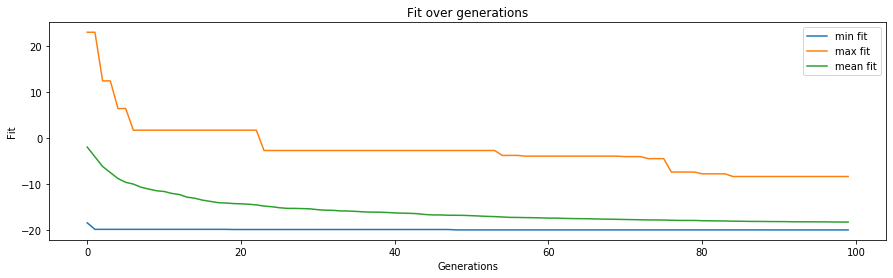


		Final Solution: [-0.00036097  0.00354584] 	fit: -19.99747987239016


In [15]:
show_result(result)

## Função peaks
**$min f(x) = -6.551127887452801$**

In [16]:
param = {'low_values' : [-3, -3],
         'high_values' : [3, 3],
         'n_pop' : 100,
         'max_generations': 100,
         'F_min': 0.7,
         'F_max': 0.9,
         'C_min': 0.6,
         'C_max': 0.9
        }

result = differential_evolution(param, peaks)

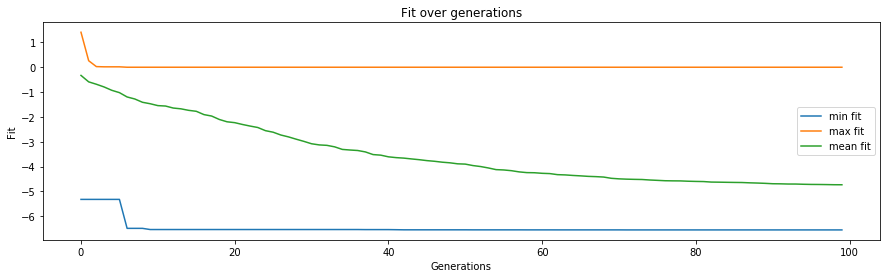


		Final Solution: [ 0.22501734 -1.62676615] 	fit: -6.551024406533188


In [17]:
show_result(result)